In [522]:
# import depended libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# 1. Data Reading & Understanding


In [523]:
#loading the bike data and converting into data frame.
df=pd.read_csv('day.csv')
plt.style.use("dark_background")


In [524]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [525]:
df.shape

(730, 16)

In [526]:
#To check if there is any headers/footers or summary details rows present and if yes, then delete it.

In [527]:
df.head() #summary about the bike data
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [528]:
df.tail() #checking if total, subtotal rows present

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [529]:
# from above analysis we can see that there is no header/footers/summary/total rows present.
# also number of rows are 730 and columns are 16.

In [530]:
#to check if there is any null values.

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [532]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [533]:
#we can see that there is no null values present.


In [534]:
#here data looks within the permissable range.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [535]:
# Delete unnecessary columns:


In [536]:
# from above analysis we can see that the columns instant in unique in nature and act like a id which is not required , hence we can drop them.
# we can  see that only dteday is of object type while others attribute is of int/float type.
# since we already having month and year so we can drop dteday columns.

In [537]:
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))

Total columns with values NA:  0


In [538]:
#lets delete all the columns which values is unique in nature.

In [539]:
unique_columns =[col for col in df.columns if df[col].nunique()== len(df)]
unique_columns

['instant', 'dteday']

In [540]:
dropped_columns=['instant','dteday']
df.drop(dropped_columns,axis=1,inplace=True)
df.shape

(730, 14)

In [541]:
#checking if there is any duplicate rows.

In [542]:
duplicate_rows = len(df[df.duplicated()])
print("Count of duplicate rows:", round(duplicate_rows,2))

Count of duplicate rows: 0


In [543]:
#no duplicate rows found.

In [544]:
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

In [545]:
#so there is no columns left wuth unique values.

In [546]:
# outcome:
# we can see that values are within the range. so there is no need to remove any outliers.


In [547]:
#Transfering the Data.

In [548]:
#from data dictionary and above analysis we can say that season, weathersit and month are categorical values.
#lets convert season, weathersit and month to category type.
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 65.7 KB


In [549]:
#as per data dictionary , following are the categorical variables has following values.
# 1. yr has two values 0 for 2018 and 1 for 2019.
# 2. holiday 0 or 1.
# 3. working day 0 or 1.
# 4. weathersit has four values good, moderate, bad and severe weathersit.
# 5. season (1:spring, 2:summer,3:fall,4:winter)
# all the data seems to be in range.

In [550]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:"good", 2:"moderate", 3:"bad", 4:"severe"},inplace = True)
df.mnth = df.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct',11:'nov', 12:'dec'})
df.weekday = df.weekday.replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat', 7:'sun'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. EDA

#### Univariate Analysis

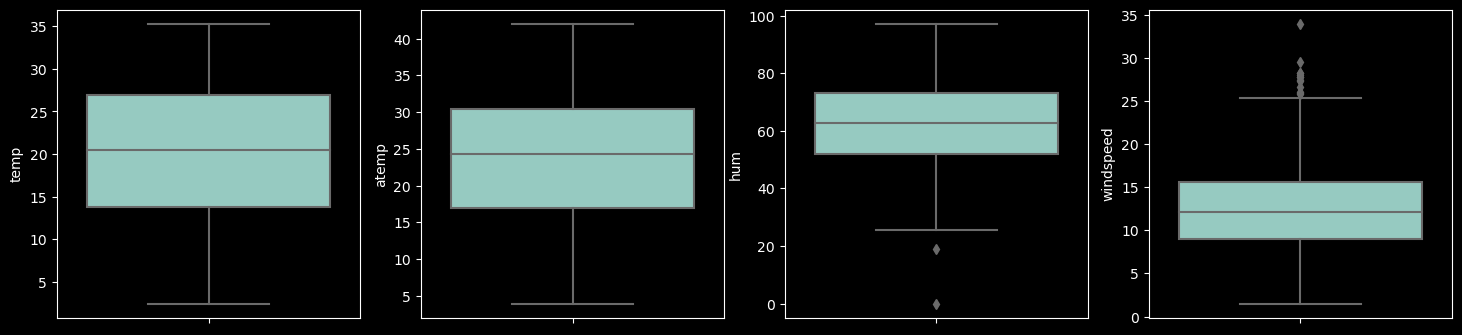

In [551]:
#lets check if any outliers present is numeric features.
# raw box plots for independent variables with continuous values.
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=df)
    k+=1

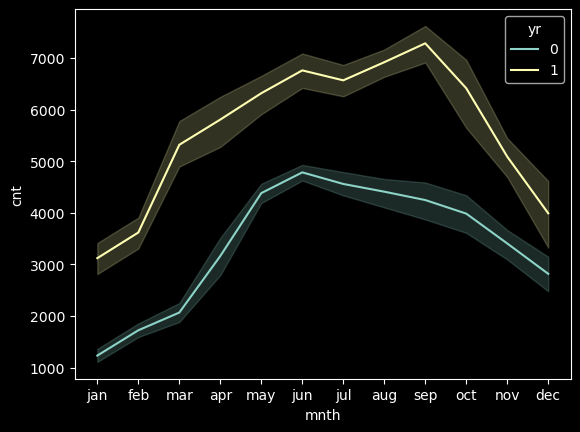

In [552]:
#line graph will show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y ="cnt", data=df, hue ="yr")
plt.show()

In [553]:
#outcome:
# 1. from line graph we can see that target variable cnt has increased from 2018 to 2019.
# 2. demand for bike is high between may to oct for year 2018 and 2019.
# 3. from boxchart we can also see that there is no outliers present.

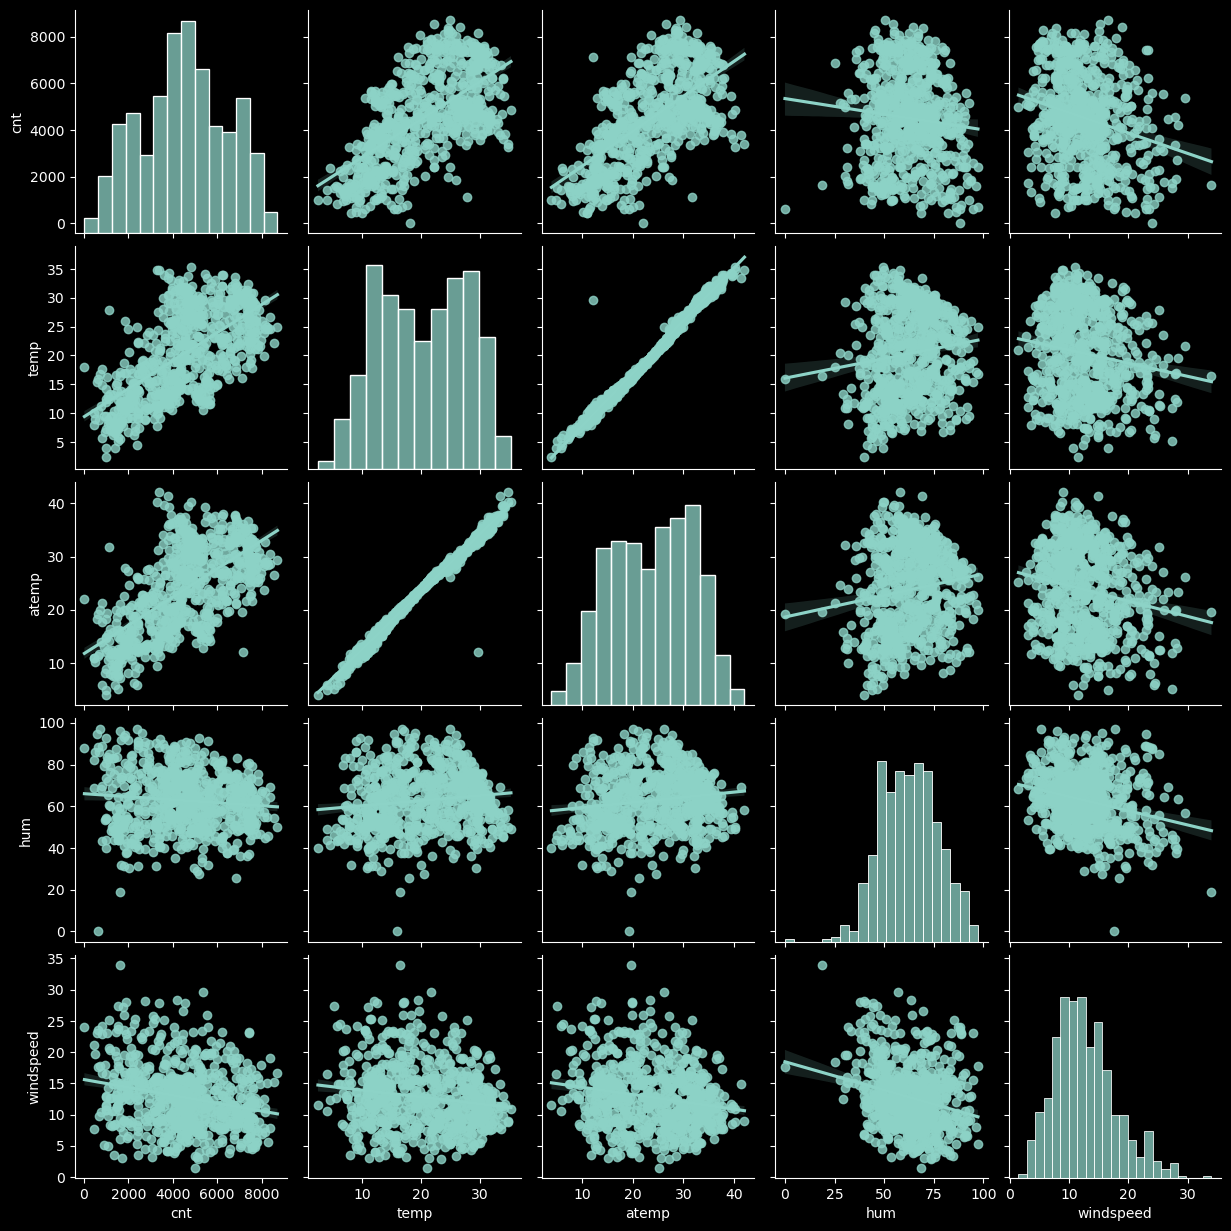

In [554]:
# Lets plot pairplots to have better understanding if cnt is linearly depend upon independent variable.
numerical_variables =['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data=df,vars=numerical_variables,kind="reg")
plt.show()

In [555]:
#outcome:
# we can see that we have linealy dependency between temp, atemp and count.
# we can also see that temp and atemp is highly correlated.


#### Bivariate Analysis

In [556]:
# barcharts for categorical variables to see demands.


In [557]:
#function to create barplot related to categorical columns.

def plot_bar_graphs(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'bar plot of {column} vs cnt')
    
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'bar plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels =['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

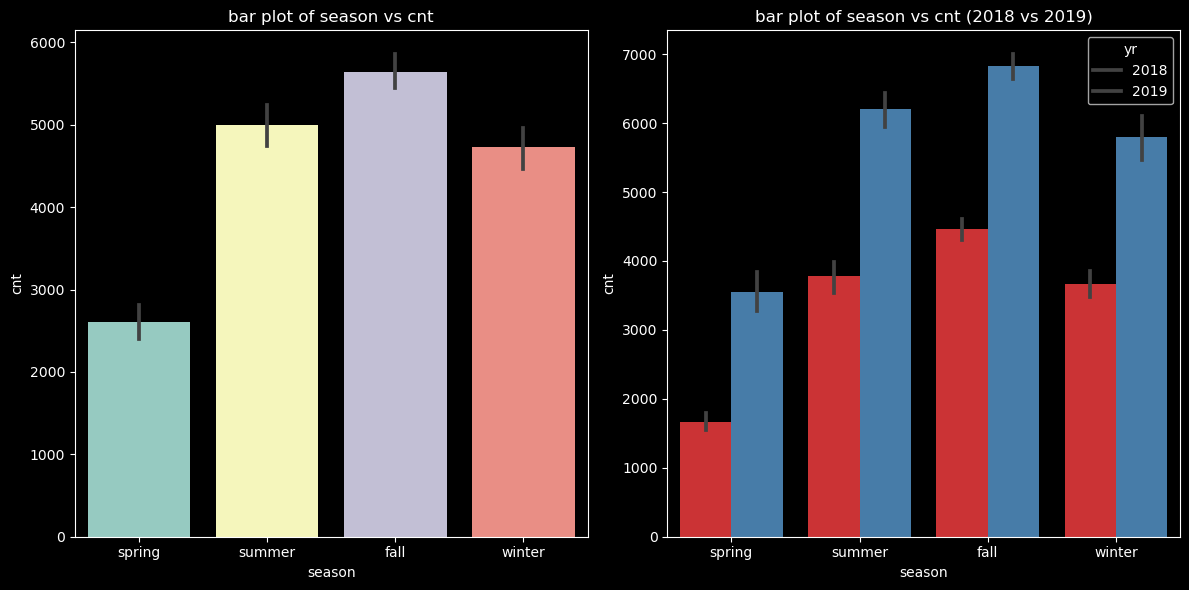

In [558]:
plot_bar_graphs('season')

In [559]:
#outcome:
# fall seasons have high bike rental request.
# bike rental has increased in 2019 as compared to 2018.


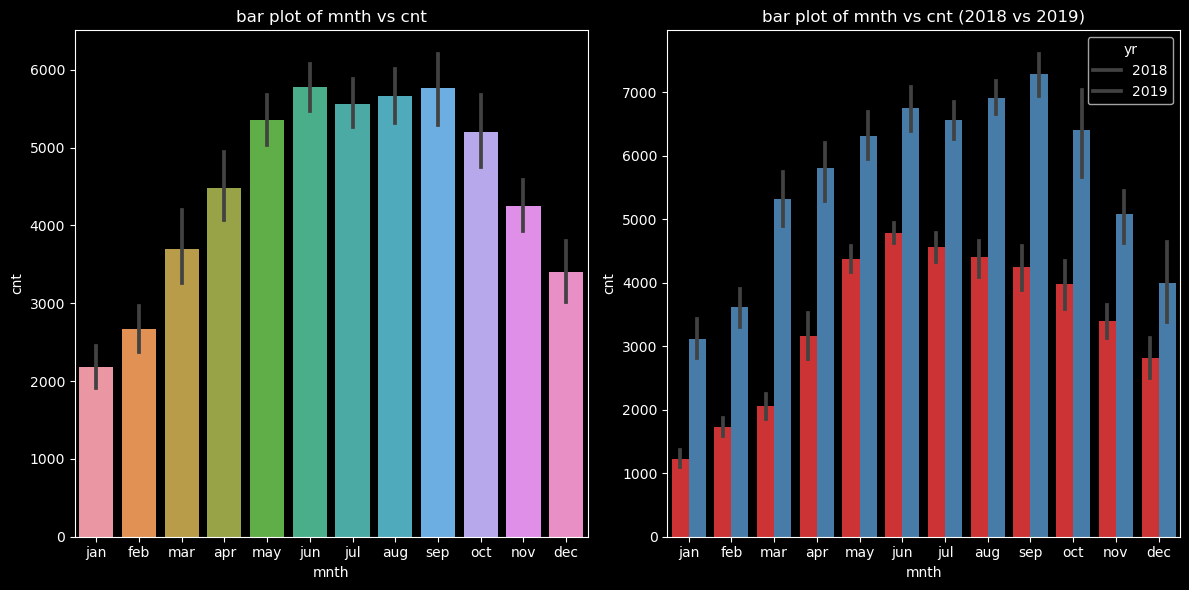

In [560]:
plot_bar_graphs('mnth')

In [561]:
#outcome:
# may to oct have high bike registeration.
# bike registeration have increased in 2019 as compared to 2018.

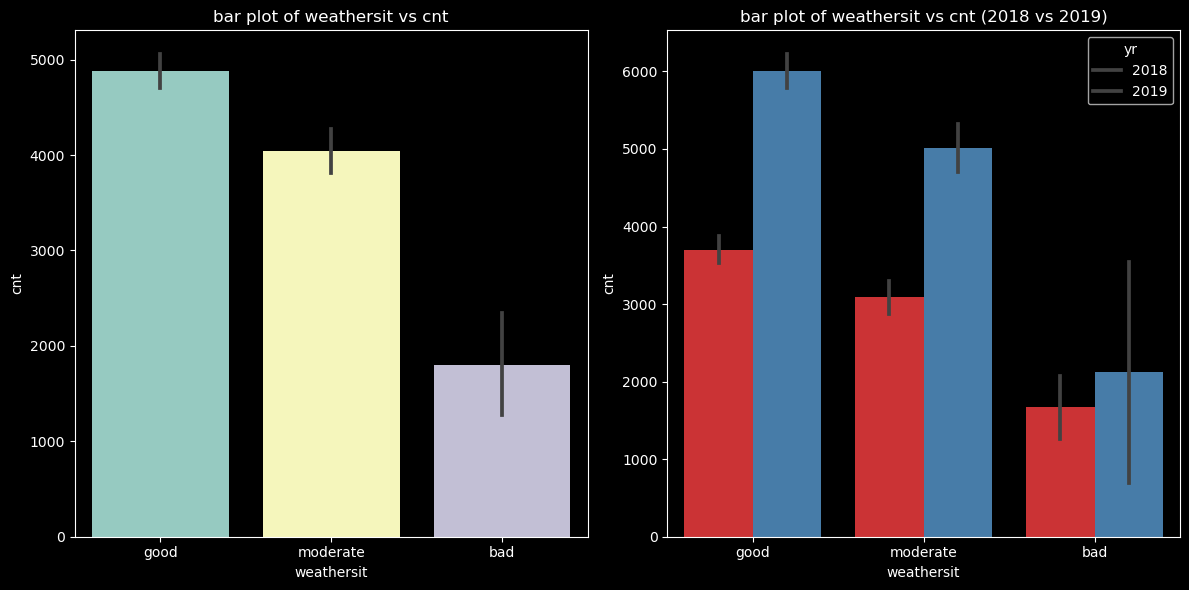

In [562]:
plot_bar_graphs('weathersit')

In [563]:
#outcome:
# people prefer to ride bike when weather is good.
# bike registeration have increased in 2019 as compared to 2018 for every weather season.

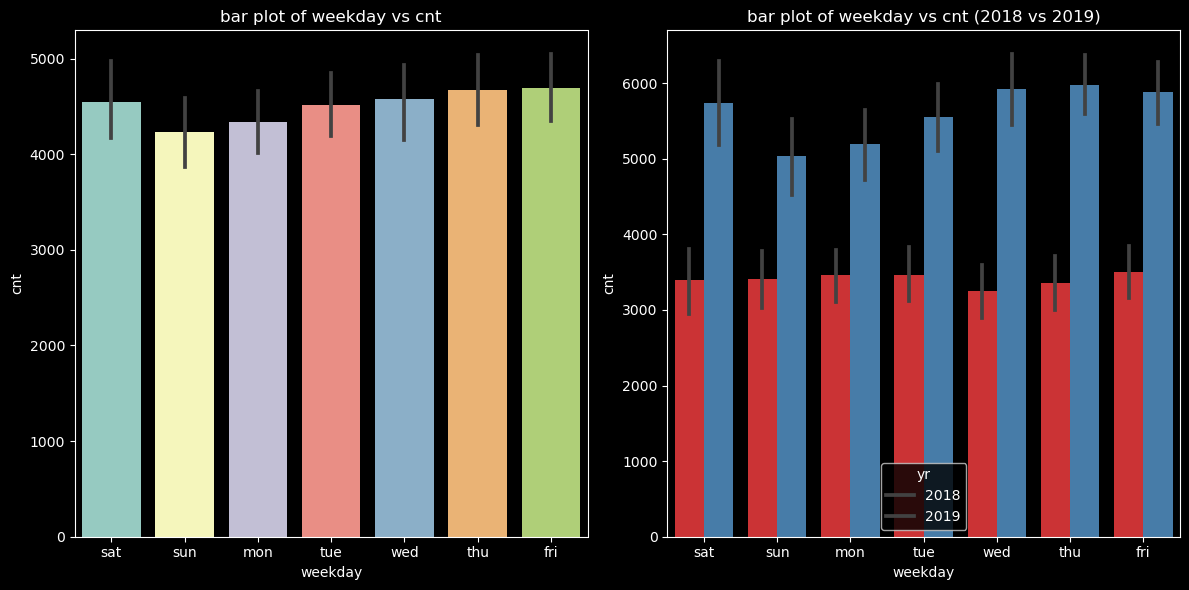

In [564]:
plot_bar_graphs('weekday')

In [565]:
#outcome:
# people avoid riding bike on weekends.

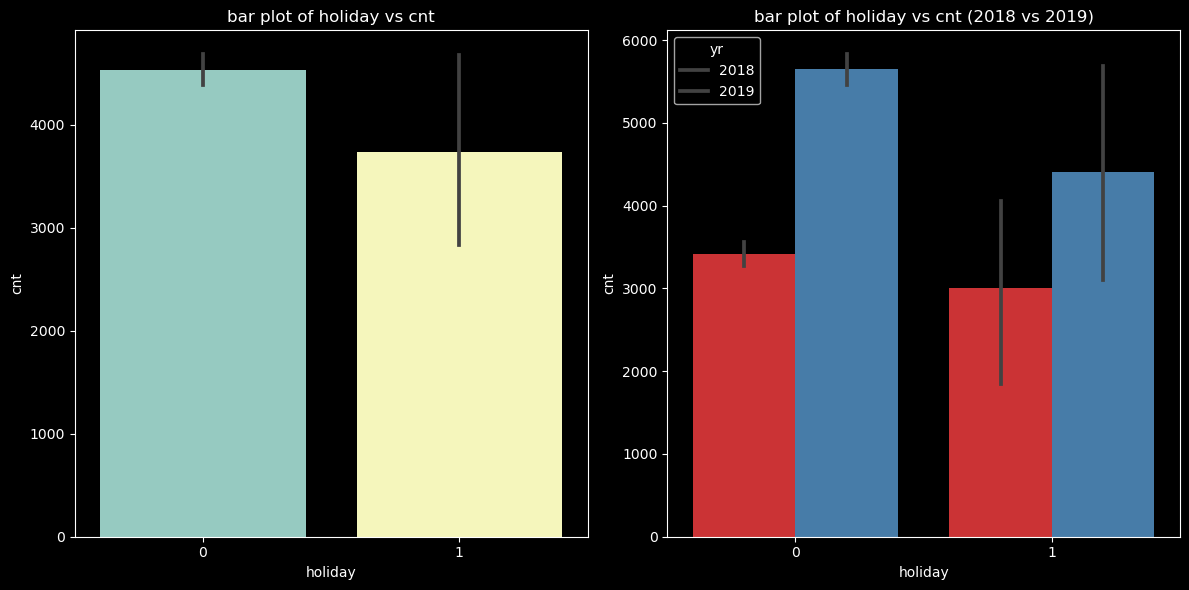

In [566]:
plot_bar_graphs('holiday')

In [567]:
#outcome:
# people prefer to ride bike on weekdays.

In [568]:
#lets draw heatmap to identify whether is there any correlation or not?

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(6), object(1)
memory usage: 65.7+ KB


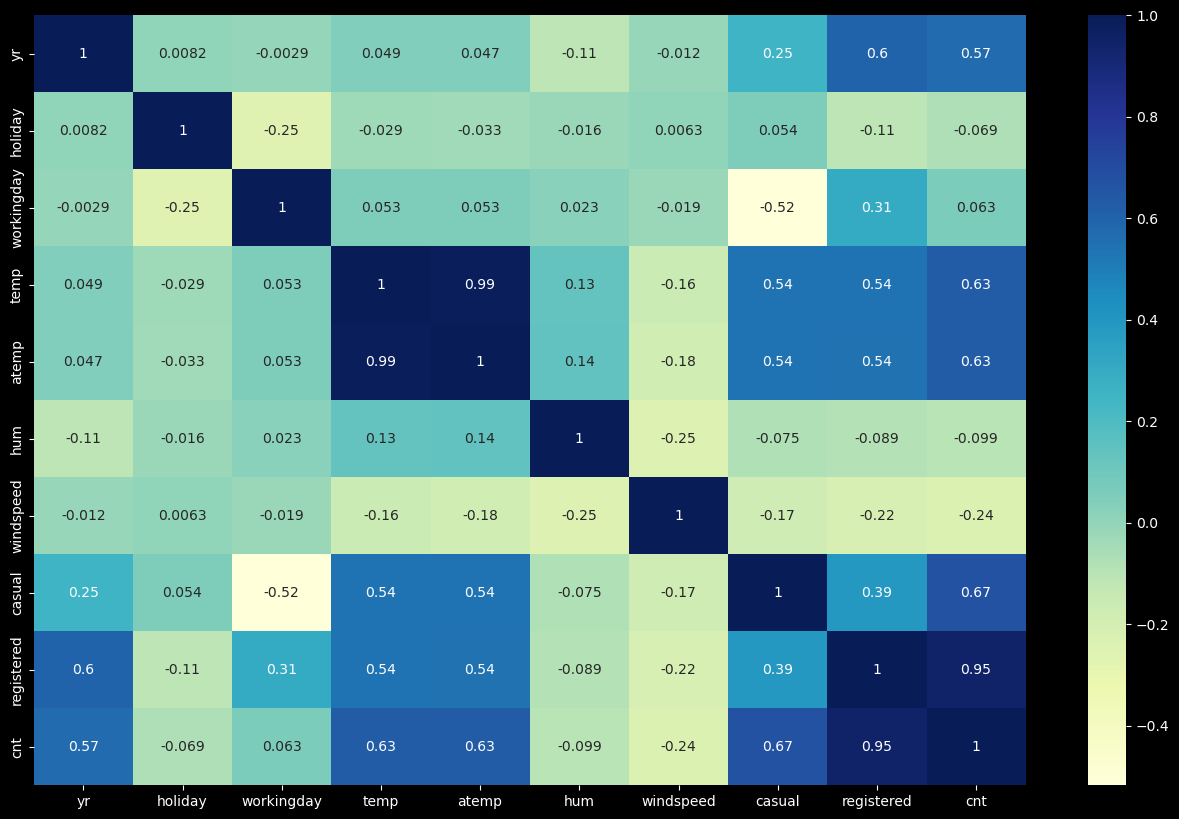

In [570]:
#lets plot the correlation metrics.(heatmap)
drop_cols=['season','weekday','weathersit','mnth']
df1 =df.drop(columns =drop_cols)
df1 = df1.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(df1, annot = True, cmap="YlGnBu")
plt.show()


In [571]:
#outcome:
# registered are higly postively correlated with cnt.


In [572]:
df.shape

(730, 14)

In [573]:
# dropping casual and registered as they sumed to cnt.
df.drop(['casual','registered'],axis=1,inplace=True)

In [574]:
df.shape

(730, 12)

# 3. Data Preparation

In [575]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


#### Creating dummy variables for categorical variables. 

In [576]:
# we need to create dummy variable for four categorical variables. 'mnth','weekday','season','weathersit'.

In [577]:
df = pd.get_dummies(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    bool   
 9   season_summer        730 non-null    bool   
 10  season_fall          730 non-null    bool   
 11  season_winter        730 non-null    bool   
 12  mnth_jan             730 non-null    bool   
 13  mnth_feb             730 non-null    bool   
 14  mnth_mar             730 non-null    bool   
 15  mnth_apr             730 non-null    boo

In [578]:
df['weekday_mon'] = df['weekday_mon'].astype(int)
df['weekday_tue'] = df['weekday_tue'].astype(int)
df['weekday_wed'] = df['weekday_wed'].astype(int)
df['weekday_thu'] = df['weekday_thu'].astype(int)

df['weekday_sat'] = df['weekday_sat'].astype(int)
df['weekday_sun'] = df['weekday_sun'].astype(int)


df['mnth_feb'] = df['mnth_feb'].astype(int)
df['mnth_mar'] = df['mnth_mar'].astype(int)
df['mnth_apr'] = df['mnth_apr'].astype(int)
df['mnth_may'] = df['mnth_may'].astype(int)
df['mnth_jun'] = df['mnth_jun'].astype(int)
df['mnth_jul'] = df['mnth_jul'].astype(int)
df['mnth_aug'] = df['mnth_aug'].astype(int)
df['mnth_sep'] = df['mnth_sep'].astype(int)
df['mnth_oct'] = df['mnth_oct'].astype(int)
df['mnth_nov'] = df['mnth_nov'].astype(int)
df['mnth_dec'] = df['mnth_dec'].astype(int)

df['season_fall'] = df['season_fall'].astype(int)
df['season_winter'] = df['season_winter'].astype(int)
df['season_summer'] = df['season_summer'].astype(int)


df['weathersit_bad'] = df['weathersit_bad'].astype(int)
df['weathersit_moderate'] = df['weathersit_moderate'].astype(int)

df.drop(['season_spring','weekday_fri','weathersit_good','mnth_jan'],axis=1,inplace=True)



df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [579]:
#divide the train and test data.
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=100)

In [580]:
df_train.shape

(547, 30)

In [581]:
df_test.shape

(183, 30)

#### Scaling numeric variables

In [582]:
# scaling numeric variables of training data using MinMaxScaler between 0-1.
num_vars = ['temp','atemp','hum','windspeed','cnt']
scaler=MinMaxScaler()

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [583]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,1,0,0,0,0,0,1,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,1,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,0,0,0,0,1,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,0,0,...,0,0,0,1,0,0,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,1,...,0,0,0,0,1,0,0,0,0,0


In [584]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382,0.244973,0.252285,...,0.082267,0.087751,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737,0.349177,0.027422
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008,0.430465,0.434722,...,0.275022,0.283192,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094,0.477146,0.163460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [585]:
# from above analysis we can see that numeric variables has scaled between 0 and 1.

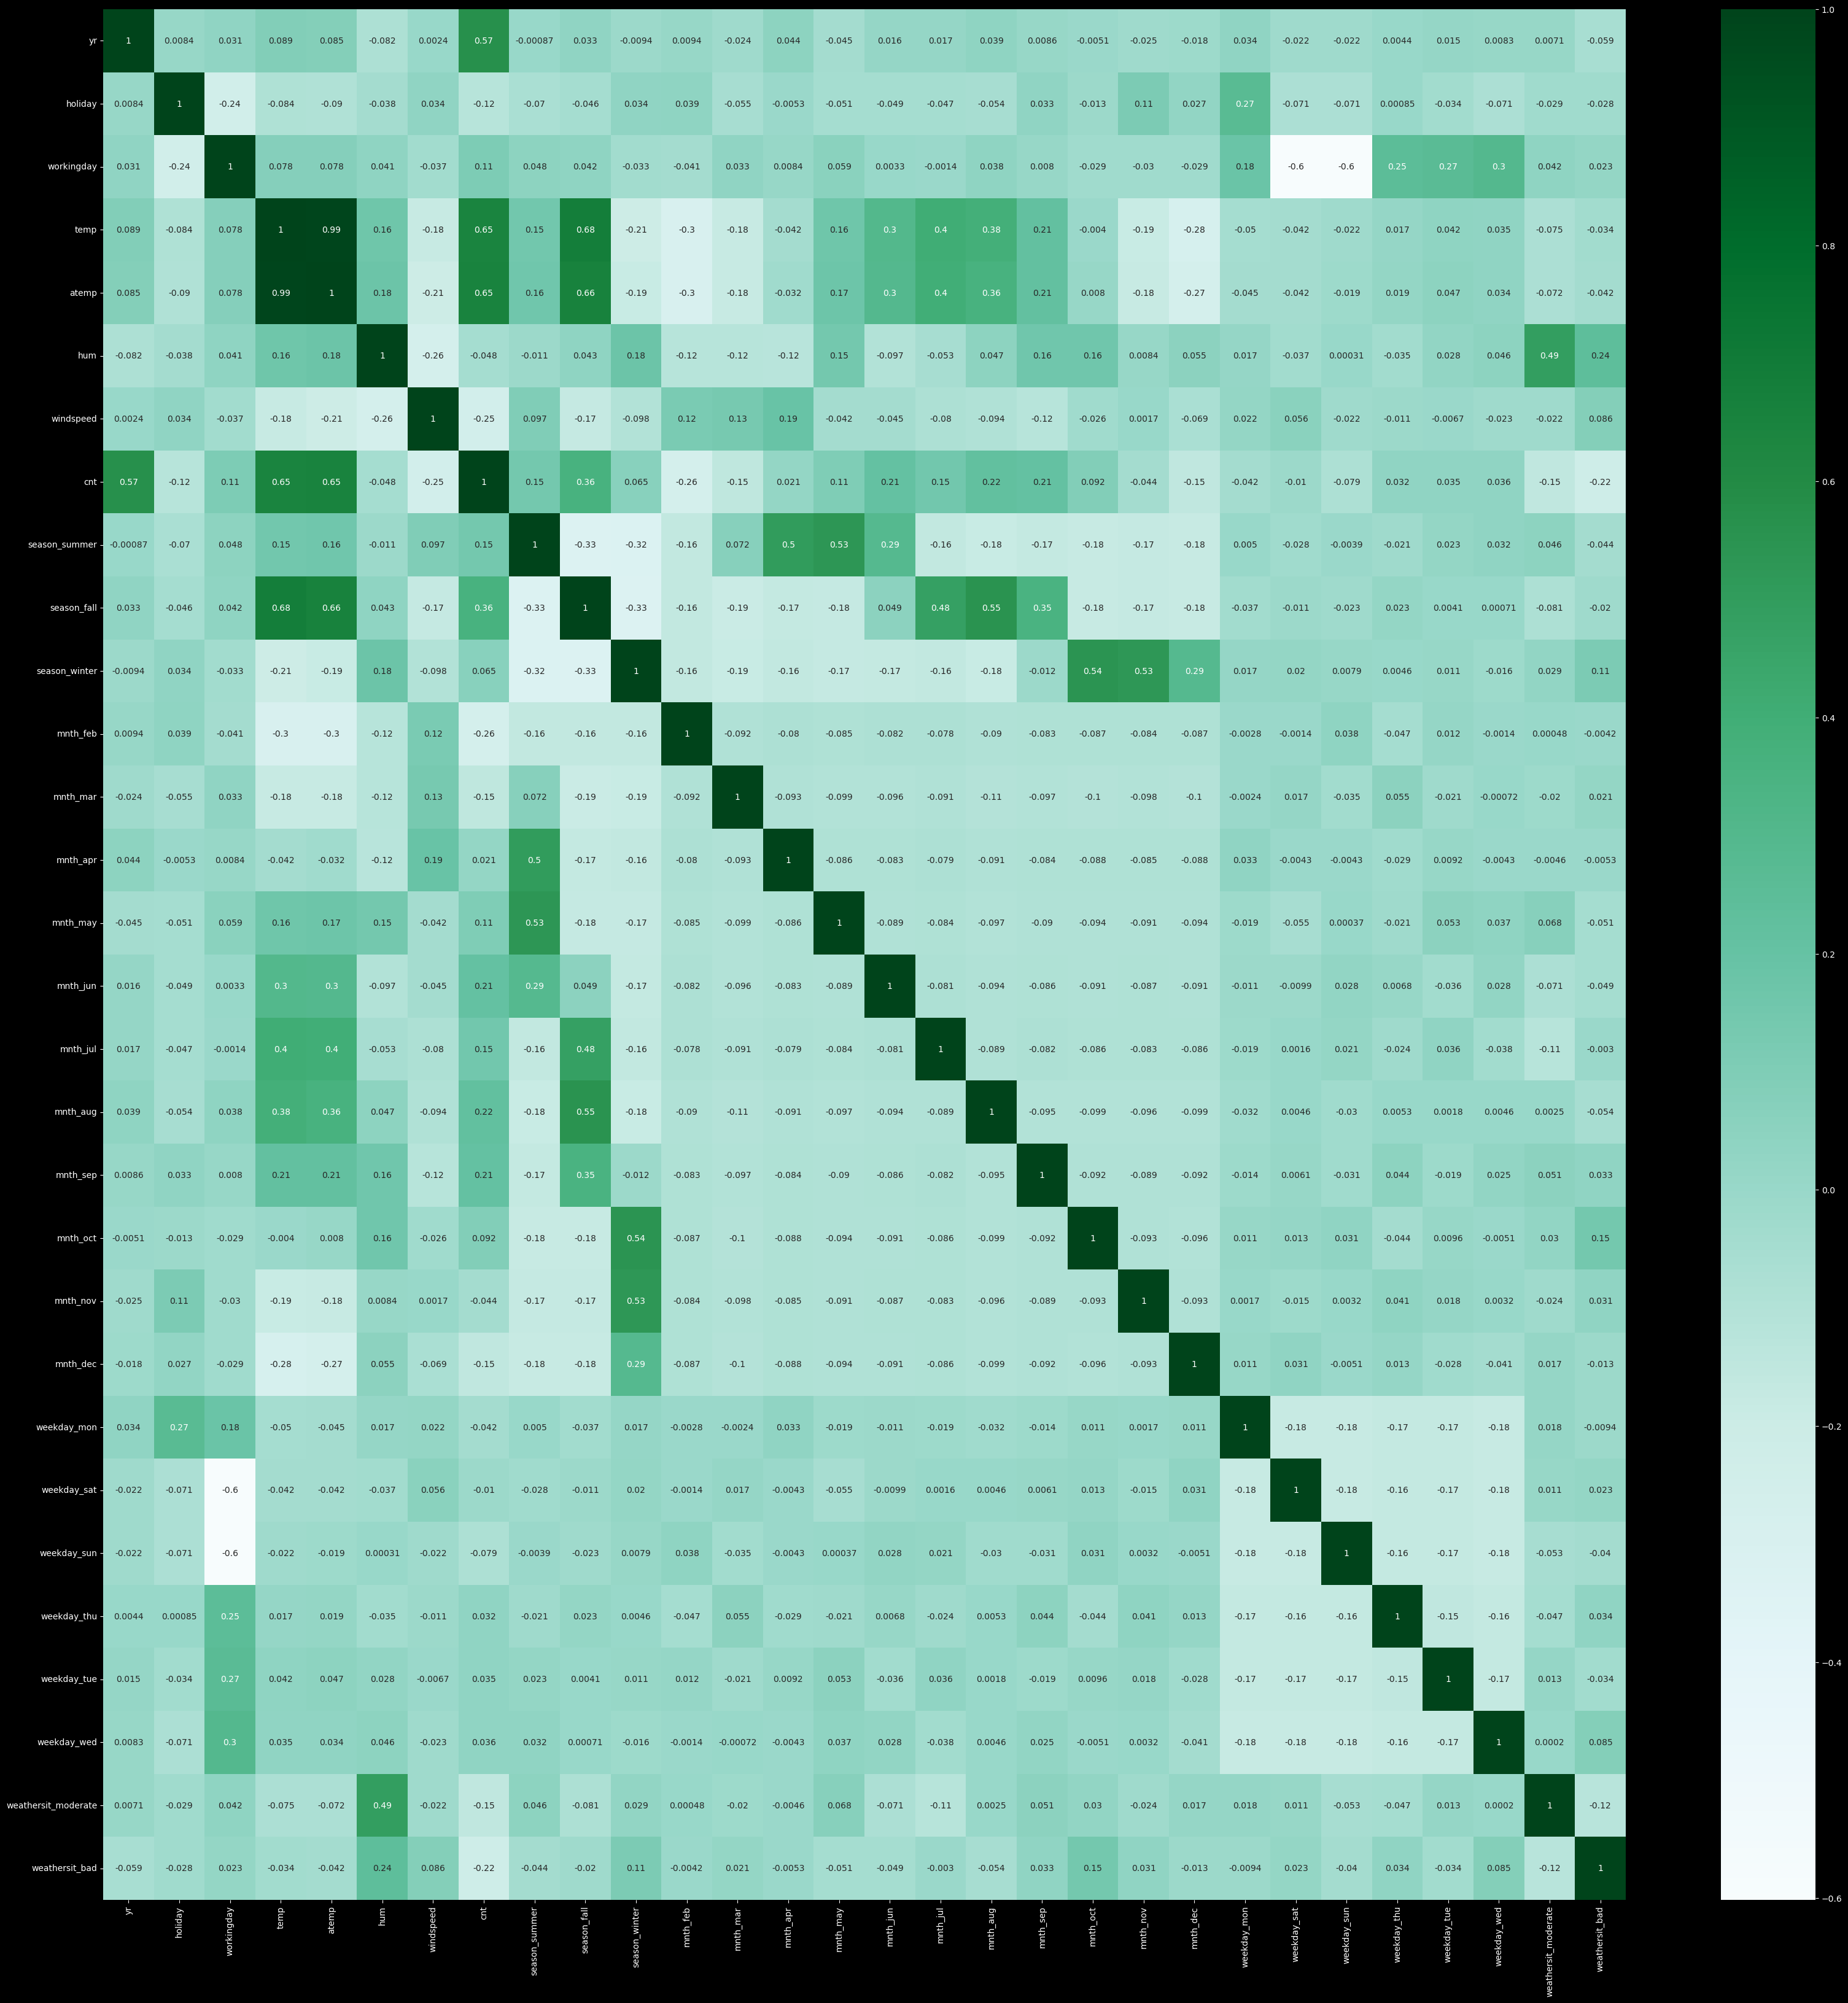

In [586]:
#plotting a correlation metrics.
plt.figure(figsize=(40,40))
sns.heatmap(df_train.corr(), annot=True, cmap="BuGn")
plt.show()

In [587]:
#popping seperating independent and dependent variables.
y_train=df_train.pop('cnt')
X_train=df_train

#  4. Build a Model

#### Model #1

In [588]:
# Building a model with all features using statsmodels.
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const                  0.150386
yr                     0.230799
holiday               -0.022558
workingday             0.078823
temp                   0.391615
atemp                  0.054732
hum                   -0.146786
windspeed             -0.177329
season_summer          0.095992
season_fall            0.051909
season_winter          0.166105
mnth_feb               0.027713
mnth_mar               0.060681
mnth_apr               0.055422
mnth_may               0.076799
mnth_jun               0.068907
mnth_jul               0.024709
mnth_aug               0.079394
mnth_sep               0.141909
mnth_oct               0.065041
mnth_nov               0.011734
mnth_dec               0.005368
weekday_mon           -0.023312
weekday_sat            0.074136
weekday_sun            0.019984
weekday_thu           -0.010611
weekday_tue           -0.021888
weekday_wed           -0.008645
weathersit_moderate   -0.059812
weathersit_bad        -0.259461
dtype: float64

In [589]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          4.86e-198
Time:                        04:51:56   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1504      0.022      6.709      0.000       0.106       0.194
yr                      0.2308      0.008     30.023      0.000       0.216       0.246
holiday                -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday              0.0788      0.010      7.746      0.000       0.059       0.099
temp                    0.3916      0.138      2.838      0.005       0.121       0.663
atemp                   0.0547      0.136      0.404      0.686      -0.211       0.321
hum                    -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed              -0.1773      0.025     -7.069      0.000      -0.227      -0.128
season_summer           0.0960      0.023      4.210      0.000       0.051       0.141
season_fall             0.0519      0.028      1.828      0.068      -0.004       0.108
season_winter           0.1661      0.024      7.001      0.000       0.119       0.213
mnth_feb                0.0277      0.019      1.449      0.148      -0.010       0.065
mnth_mar                0.0607      0.021      2.880      0.004       0.019       0.102
mnth_apr                0.0554      0.032      1.720      0.086      -0.008       0.119
mnth_may                0.0768      0.035      2.222      0.027       0.009       0.145
mnth_jun                0.0689      0.037      1.878      0.061      -0.003       0.141
mnth_jul                0.0247      0.042      0.595      0.552      -0.057       0.106
mnth_aug                0.0794      0.039      2.010      0.045       0.002       0.157
mnth_sep                0.1419      0.035      4.045      0.000       0.073       0.211
mnth_oct                0.0650      0.032      2.052      0.041       0.003       0.127
mnth_nov                0.0117      0.030      0.387      0.699      -0.048       0.071
mnth_dec                0.0054      0.024      0.227      0.821      -0.041       0.052
weekday_mon            -0.0233      0.015     -1.582      0.114      -0.052       0.006
weekday_sat             0.0741      0.012      6.386      0.000       0.051       0.097
weekday_sun             0.0200      0.012      1.688      0.092      -0.003       0.043
weekday_thu            -0.0106      0.015     -0.707      0.480      -0.040       0.019
weekday_tue            -0.0219      0.015     -1.474      0.141      -0.051       0.007
weekday_wed            -0.0086      0.015     -0.596      0.551      -0.037       0.020
weathersit_moderate    -0.0598      0.010     -6.002      0.000      -0.079      -0.040
weathersit_bad         -0.2595      0.026     -9.971      0.000      -0.311      -0.208
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):       

In [590]:
#here we can see all adjusted r-square is 0.848 is pretty good.

In [591]:
# since number of predictor variables is around 30.
# will use hybrid (REF + manual) to eliminate insignificance variable.

In [592]:
# Importing RFE and LinearRegression.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [593]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [594]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe= rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 3),
 ('mnth_apr', False, 6),
 ('mnth_may', False, 4),
 ('mnth_jun', False, 5),
 ('mnth_jul', False, 9),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_dec', False, 15),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [595]:
# RFE support variables.
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_sep', 'mnth_oct',
       'weekday_sat', 'weekday_sun', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [596]:
# RFE not supported variables.
X_train.columns[~rfe.support_]


Index(['atemp', 'season_fall', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [597]:
# lets consider only the RFE supported columns for model building.
X_train_rfe= X_train[col]

In [598]:
# Model#2

In [599]:
# Generic function to calculate VIF of variables.

def calculateVIF(df):
    vif= pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [600]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.53
12,weekday_sun,7.97
11,weekday_sat,7.73
1,holiday,2.23
4,hum,1.88
7,season_winter,1.72
3,temp,1.61
13,weathersit_moderate,1.58
10,mnth_oct,1.52
8,mnth_aug,1.46


In [601]:
# model 2
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

#create a first fitted model
lr2 = sm.OLS(y_train,X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.91e-209
Time:                        04:51:57   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1565      0.021      7.491      0.000       0.115       0.198
yr                      0.2272      0.008     29.807      0.000       0.212       0.242
holiday                -0.0399      0.019     -2.081      0.038      -0.077      -0.002
workingday              0.0781      0.008      9.351      0.000       0.062       0.095
temp                    0.5361      0.021     25.313      0.000       0.494       0.578
hum                    -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed              -0.1817      0.024     -7.533      0.000      -0.229      -0.134
season_summer           0.1072      0.010     10.344      0.000       0.087       0.128
season_winter           0.1390      0.011     12.134      0.000       0.116       0.161
mnth_aug                0.0572      0.016      3.657      0.000       0.026       0.088
mnth_sep                0.1256      0.016      8.096      0.000       0.095       0.156
mnth_oct                0.0436      0.016      2.660      0.008       0.011       0.076
weekday_sat             0.0857      0.010      8.206      0.000       0.065       0.106
weekday_sun             0.0325      0.011      3.051      0.002       0.012       0.053
weathersit_moderate    -0.0572      0.010     -5.772      0.000      -0.077      -0.038
weathersit_bad         -0.2496      0.026     -9.742      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                     1.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [602]:
#from above analysis all the variables is having low p-values.
#increased from 0.843 to 0.847 after dropping 14 features.
# from above vif table we can see that working day is having high vif value that is 31.53.

In [603]:
X_train_rfe2 = X_train_rfe.drop(['workingday'], axis=1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,mnth_oct,weekday_sat,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,1,0,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,1,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,0,0,1,0,0,1,0,0


In [604]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,hum,14.57
2,temp,10.01
4,windspeed,3.65
6,season_winter,2.26
12,weathersit_moderate,2.16
0,yr,2.01
5,season_summer,1.86
9,mnth_oct,1.65
7,mnth_aug,1.60
8,mnth_sep,1.35


In [605]:
# Model 3
# add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

#create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.91e-209
Time:                        04:51:57   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2346      0.026      9.089      0.000       0.184       0.285
yr                      0.2272      0.008     29.807      0.000       0.212       0.242
holiday                -0.1180      0.023     -5.043      0.000      -0.164      -0.072
temp                    0.5361      0.021     25.313      0.000       0.494       0.578
hum                    -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed              -0.1817      0.024     -7.533      0.000      -0.229      -0.134
season_summer           0.1072      0.010     10.344      0.000       0.087       0.128
season_winter           0.1390      0.011     12.134      0.000       0.116       0.161
mnth_aug                0.0572      0.016      3.657      0.000       0.026       0.088
mnth_sep                0.1256      0.016      8.096      0.000       0.095       0.156
mnth_oct                0.0436      0.016      2.660      0.008       0.011       0.076
weekday_sat             0.0076      0.011      0.703      0.482      -0.014       0.029
weekday_sun            -0.0456      0.011     -4.236      0.000      -0.067      -0.024
weathersit_moderate    -0.0572      0.010     -5.772      0.000      -0.077      -0.038
weathersit_bad         -0.2496      0.026     -9.742      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
#from above analysis we can see that weekday_sat is having high p value 0.482>0.05 and hum VIP is 14.57>5.
#lets drop weekday_sat.


In [607]:
X_train_rfe3 = X_train_rfe2.drop(["weekday_sat"],axis =1)
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,mnth_oct,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.743667,0.057471,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.735509,0.156398,0,0,0,1,0,1,0,0


In [608]:
calculateVIF(X_train_rfe3)

,Features,VIF
3,hum,14.46
2,temp,10.01
4,windspeed,3.60
6,season_winter,2.26
11,weathersit_moderate,2.16
0,yr,2.01
5,season_summer,1.86
9,mnth_oct,1.65
7,mnth_aug,1.60
8,mnth_sep,1.35


In [609]:
# Model 4
# add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

#create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.56e-210
Time:                        04:51:57   Log-Likelihood:                 560.92
No. Observations:                 547   AIC:                            -1094.
Df Residuals:                     533   BIC:                            -1034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2366      0.026      9.229      0.000       0.186       0.287
yr                      0.2270      0.008     29.813      0.000       0.212       0.242
holiday                -0.1195      0.023     -5.131      0.000      -0.165      -0.074
temp                    0.5356      0.021     25.316      0.000       0.494       0.577
hum                    -0.1723      0.036     -4.833      0.000      -0.242      -0.102
windspeed              -0.1810      0.024     -7.514      0.000      -0.228      -0.134
season_summer           0.1071      0.010     10.339      0.000       0.087       0.127
season_winter           0.1391      0.011     12.150      0.000       0.117       0.162
mnth_aug                0.0574      0.016      3.672      0.000       0.027       0.088
mnth_sep                0.1259      0.016      8.118      0.000       0.095       0.156
mnth_oct                0.0438      0.016      2.671      0.008       0.012       0.076
weekday_sun            -0.0470      0.011     -4.442      0.000      -0.068      -0.026
weathersit_moderate    -0.0571      0.010     -5.763      0.000      -0.077      -0.038
weathersit_bad         -0.2493      0.026     -9.737      0.000      -0.300      -0.199
==============================================================================
Omnibus:                       74.555   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.284
Skew:                          -0.688   Prob(JB):                     3.93e-43
Kurtosis:                       5.583   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [610]:
#we can see that adj- r-squared is 0.847 and p-value is less than 0.05 for every features.
#vif for hum feature is 14.57>5  and lets remove it.

In [611]:
X_train_rfe4 = X_train_rfe3.drop(["hum"],axis =1)
X_train_rfe4.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_aug,mnth_sep,mnth_oct,weekday_sun,weathersit_moderate,weathersit_bad
311,0,0,0.435124,0.057471,0,1,0,0,0,0,0,0
523,1,0,0.735215,0.286093,1,0,0,0,0,0,0,0
381,1,0,0.391151,0.659615,0,0,0,0,0,0,1,0
413,1,0,0.358285,0.319514,0,0,0,0,0,0,0,0
253,0,0,0.740406,0.156398,0,0,0,1,0,1,0,0


In [612]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
5,season_winter,1.96
4,season_summer,1.86
8,mnth_oct,1.63
6,mnth_aug,1.60
10,weathersit_moderate,1.51
7,mnth_sep,1.35
9,weekday_sun,1.17


In [613]:
#creating another model where vif value for all the features is less than 0.05

In [614]:
# Model 5
# add a constant
X_train_lm5 = sm.add_constant(X_train_rfe4)

#create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     241.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          8.67e-207
Time:                        04:51:57   Log-Likelihood:                 549.19
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     534   BIC:                            -1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1376      0.016      8.744      0.000       0.107       0.169
yr                      0.2311      0.008     29.921      0.000       0.216       0.246
holiday                -0.1208      0.024     -5.083      0.000      -0.168      -0.074
temp                    0.5155      0.021     24.346      0.000       0.474       0.557
windspeed              -0.1486      0.024     -6.291      0.000      -0.195      -0.102
season_summer           0.1048      0.011      9.926      0.000       0.084       0.126
season_winter           0.1310      0.012     11.334      0.000       0.108       0.154
mnth_aug                0.0558      0.016      3.497      0.001       0.024       0.087
mnth_sep                0.1193      0.016      7.569      0.000       0.088       0.150
mnth_oct                0.0408      0.017      2.440      0.015       0.008       0.074
weekday_sun            -0.0497      0.011     -4.610      0.000      -0.071      -0.029
weathersit_moderate    -0.0847      0.008    -10.255      0.000      -0.101      -0.068
weathersit_bad         -0.2958      0.024    -12.211      0.000      -0.343      -0.248
==============================================================================
Omnibus:                       72.861   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.226
Skew:                          -0.672   Prob(JB):                     2.99e-42
Kurtosis:                       5.566   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [615]:
#we will go ahead with model 5 and after dropping features, we can now fix this.

# 5.Linear Regression Assumption Proof

#### Residual Analysis

In [616]:
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

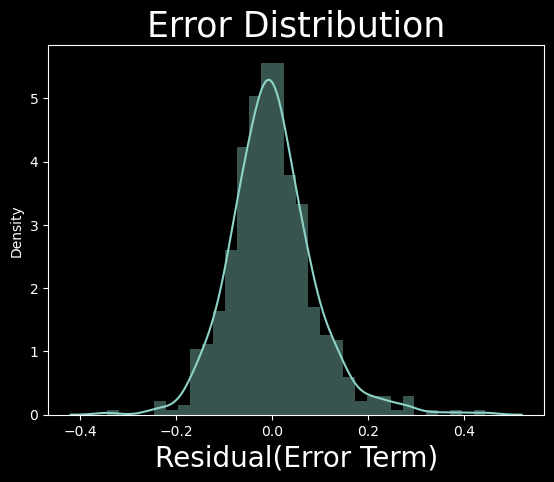

In [617]:
# 1. Assuming normally distributed error

# plot histogram on that facts.
plt.style.use("dark_background")
sns.distplot(residual)
plt.xlabel('Residual(Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict= {'fontsize': 25})

plt.show()

#### Error distributed across 0 which means model has handle the assumption clearly.</color>

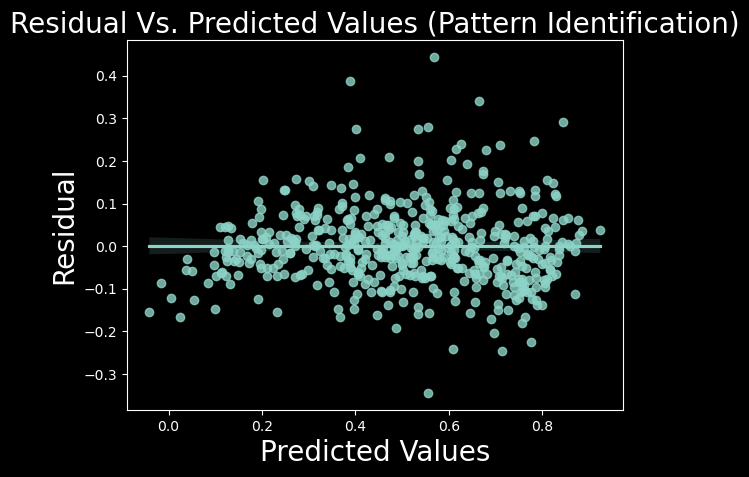

In [618]:
#  Assuming Error terms being independent.

sns.regplot(x=y_train_pred, y =residual)
plt.title('Residual Vs. Predicted Values (Pattern Identification)', fontdict= {'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Residual', fontdict={'fontsize': 20})

plt.show()

##### There is no relation between residual and predicted values.</color>

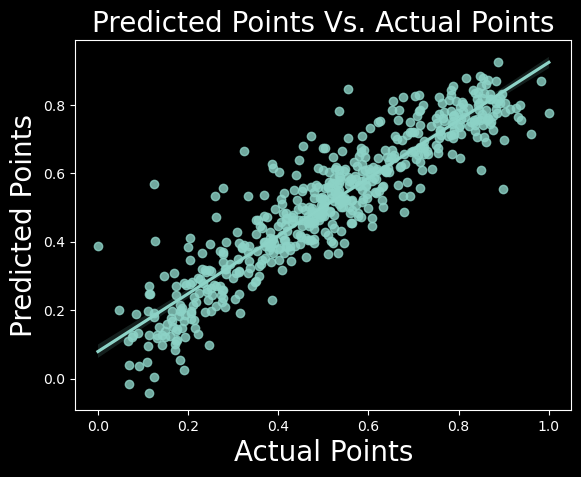

In [619]:
# 3. Homoscedasticity
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict= {'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Points', fontdict={'fontsize': 20})

plt.show()

#### Variance is similar at both the end of fitted line.</color>

In [620]:
# Multi-Correlation
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
5,season_winter,1.96
4,season_summer,1.86
8,mnth_oct,1.63
6,mnth_aug,1.60
10,weathersit_moderate,1.51
7,mnth_sep,1.35
9,weekday_sun,1.17


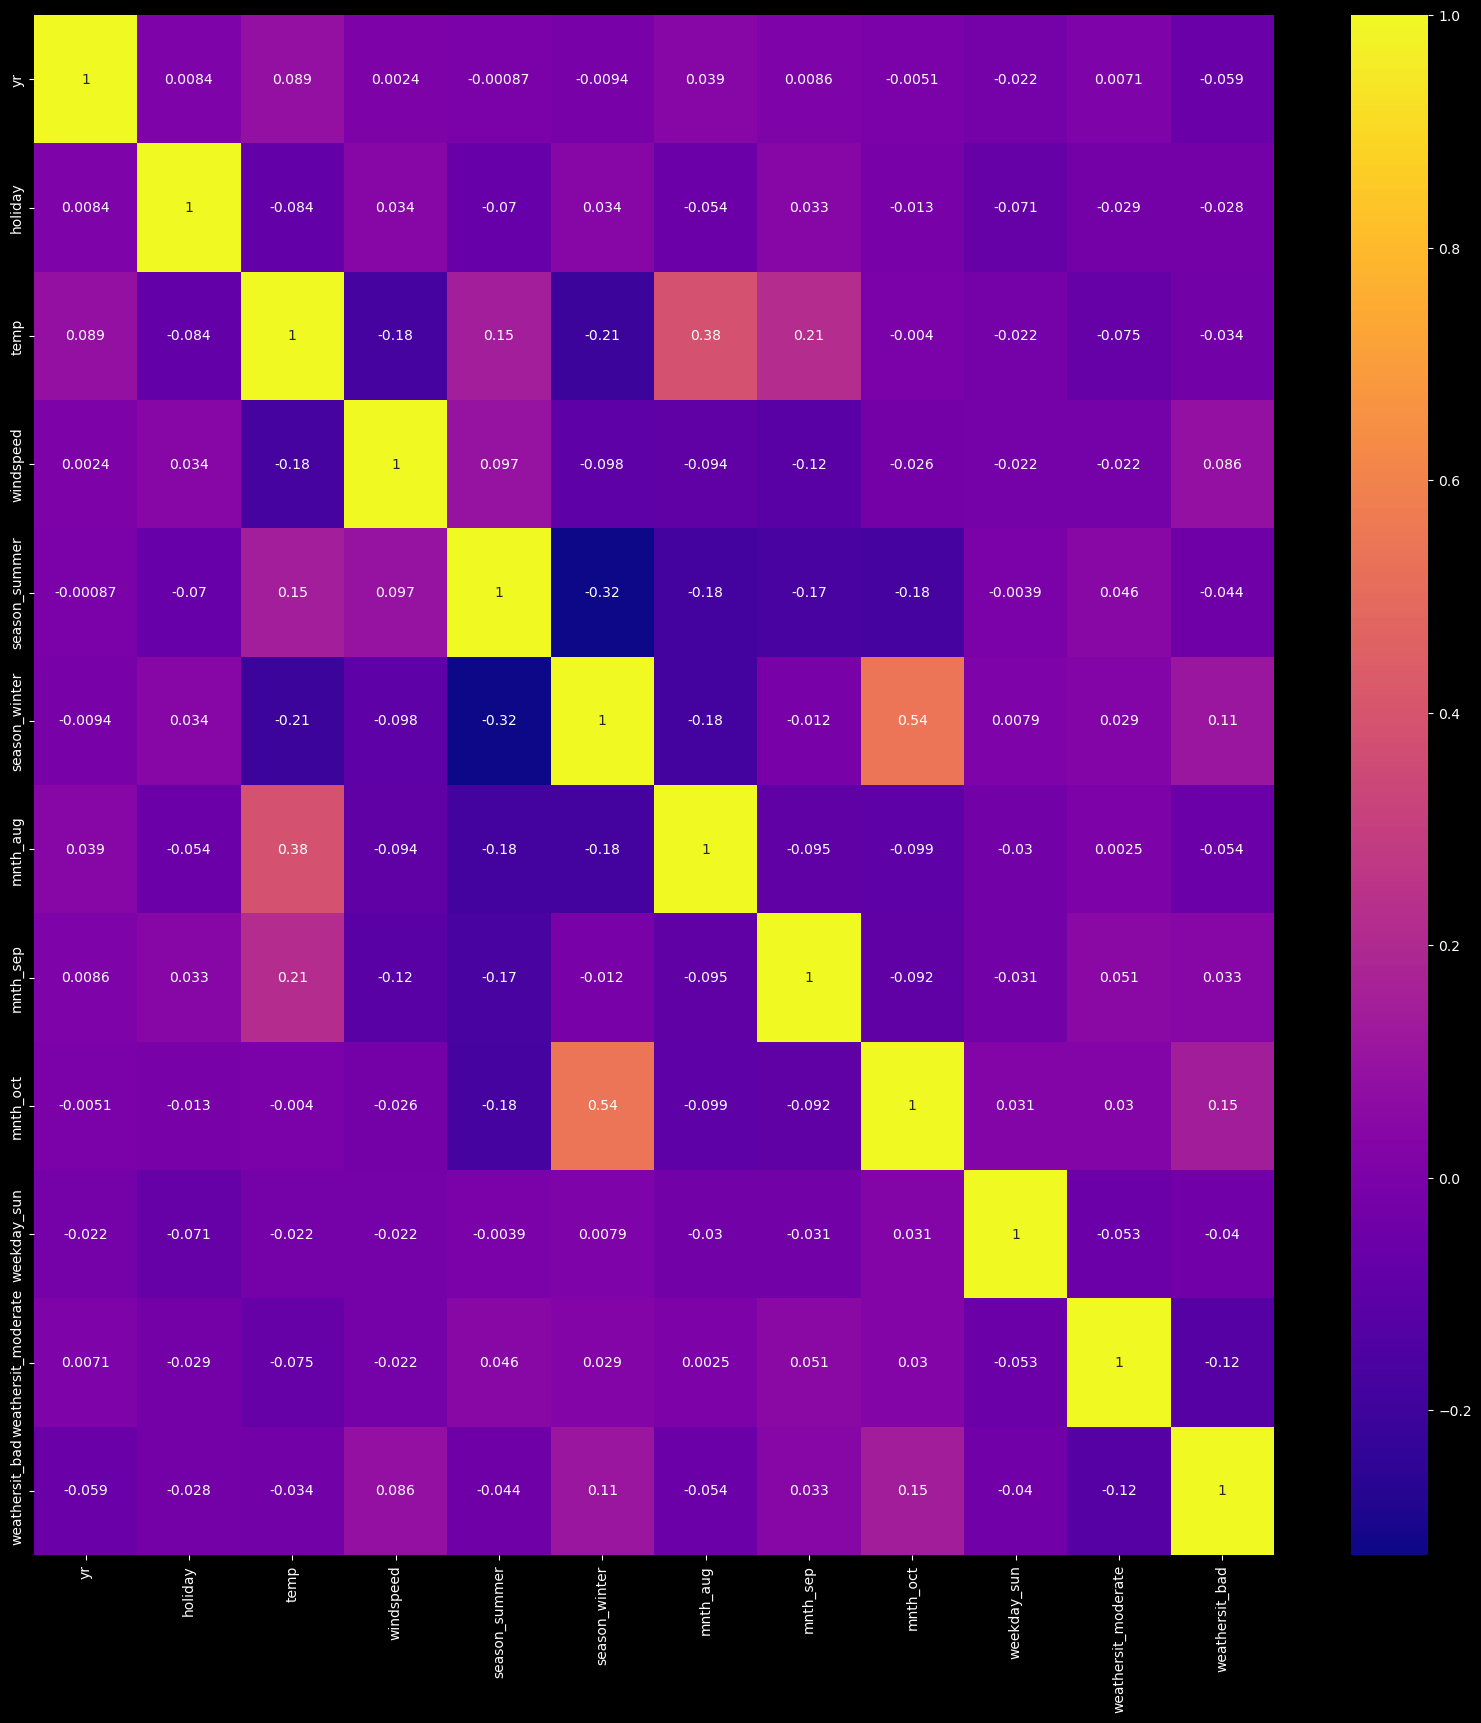

In [621]:
plt.figure(figsize= (20,20))
# Correlation Heat Map.
sns.heatmap(X_train_rfe4.corr(), cmap = "plasma", annot = True)
plt.show()

#### There is no Multi -Correlation between Independent Variables.</color>

# 6. Model Prediction On Test Data. </color>

In [622]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [623]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [624]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [625]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.273224,0.273224,...,0.081967,0.076503,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290,0.300546,0.032787
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.446837,0.446837,...,0.275067,0.266530,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858,0.459754,0.178567
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [626]:
# Divide into x and y
y_test = df_test.pop('cnt')
X_test =df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    int64  
 1   holiday              183 non-null    int64  
 2   workingday           183 non-null    int64  
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    int32  
 8   season_fall          183 non-null    int32  
 9   season_winter        183 non-null    int32  
 10  mnth_feb             183 non-null    int32  
 11  mnth_mar             183 non-null    int32  
 12  mnth_apr             183 non-null    int32  
 13  mnth_may             183 non-null    int32  
 14  mnth_jun             183 non-null    int32  
 15  mnth_jul             183 non-null    int32 

In [627]:
X_test = X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe.
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                183 non-null    float64
 1   yr                   183 non-null    int64  
 2   holiday              183 non-null    int64  
 3   temp                 183 non-null    float64
 4   windspeed            183 non-null    float64
 5   season_summer        183 non-null    int32  
 6   season_winter        183 non-null    int32  
 7   mnth_aug             183 non-null    int32  
 8   mnth_sep             183 non-null    int32  
 9   mnth_oct             183 non-null    int32  
 10  weekday_sun          183 non-null    int32  
 11  weathersit_moderate  183 non-null    int32  
 12  weathersit_bad       183 non-null    int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 14.3 KB


In [628]:
y_test_pred = lr5.predict(X_test_lr5)

In [629]:
round(lr5.params,2)

const                  0.14
yr                     0.23
holiday               -0.12
temp                   0.52
windspeed             -0.15
season_summer          0.10
season_winter          0.13
mnth_aug               0.06
mnth_sep               0.12
mnth_oct               0.04
weekday_sun           -0.05
weathersit_moderate   -0.08
weathersit_bad        -0.30
dtype: float64

# 7. Generating R-Square. </color> 

In [630]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.7795576077290954

In [631]:
train_adjusted_r_2 = 0.841
train_r2 = 0.844

In [632]:
# n is the number of rows in X

n = X_test.shape[0]

# Number of features (predictors,p) is the shape along axis 1.
p=X_test.shape[1]

# Finding adjusted R-sqaure using formulae.
test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8329882352941176

# 8. Final Model Interpretation

#### Hypothesis Testing: </color>

In [1]:
# Hypothesis testing states that:

# H0:B1=B2=...=Bn=0
# H1: at least one Bi!=0

#### lr5 model coefficient values </color>

##### const                  0.14
##### yr                     0.23
##### holiday               -0.12
##### temp                   0.52
##### windspeed             -0.15
##### season_summer          0.10
##### season_winter          0.13
##### mnth_aug               0.06
##### mnth_sep               0.12
##### mnth_oct               0.04
##### weekday_sun           -0.05
##### weathersit_moderate   -0.08
##### weathersit_bad        -0.30

In [4]:
# Insights
# From the lr5 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS.

### F Statistics
### F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

#### F-statistic: 241.6</color>
#### Prob (F-statistic): 8.67e-207</color>
#### The F-Statistics value of 241.6 (which is greater than 1) and the p-value of '~0.015' states that the overall model is significant</color>

### The equation of best fitted surface based on model lr5:

#### cnt = 0.14 + (0.23 x yr) - (0.12 x holiday) + (0.52 x temp) - (0.15 x windspeed) + (0.10 x season_summer) + (0.13 x season_winter) + (0.06 x mnth_aug) + (0.12 x mnth_sep) + (0.04 x mnth_oct) - (0.05 x weekday_sun) - (0.08 x weathersit_moderate) - (0.30 x weathersit_bad)</color>

## Final Result Comparison

### Train r-square = 0.844
### Test r-square = 0.7795
### Train adjusted r-square = 0.841
### Test adjusted r-square = 0.832
### it seems to be a good model.</color>